In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp
from matplotlib.lines import Line2D

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16

In [40]:
def CAMP_PDEP(t, x, k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt):
    cAMP = x[0]
    PDEp = x[1]

    def G(u, v, J, K):
        numerator = 2 * u * K
        den_1 = v - u + v * J + u * K
        den_2 = -4 * (v - u) * u * K
        radicand = den_1**2 + den_2
        denominator = den_1 + np.sqrt(radicand)
        return numerator / denominator

    ACp = ACt * G(r1 * cAMP, r2 * Dt, Km1 / ACt, Km2 / ACt)
    dPDEp = r3 * cAMP * ((PDEt - PDEp) / Km3) - r4 * Et * PDEp / (Km4 + PDEp)
    dcAMP = (k1 * ACp) - (k3 + k2 * PDEp) * cAMP

    return [dcAMP, dPDEp]


def plot_nullclines(k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt):
    cAMP_vals = np.linspace(-30, 30, 10000)
    ACp_vals = np.linspace(-30, 30, 10000)
    cAMP_grid, ACp_grid = np.meshgrid(cAMP_vals, ACp_vals)

    t = 0
    x = np.array([cAMP_grid, ACp_grid])
    nullclines = CAMP_PDEP(t, x, k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt)
    plt.figure(figsize=(8, 6))
    plt.scatter(0, 0, color='black', marker='o', label='Fixed point (0,0)', alpha=1, zorder=10)
    plt.scatter(0.951867, 1.65682, color='black', marker='o', label='Fixed point (0.951867,1.65682)', zorder=10)
    plt.contour(cAMP_grid, ACp_grid, nullclines[0], levels=[0], colors='#1f77b4', linestyles='solid')
    plt.grid(linestyle=':', color='lightgray')
    plt.contour(cAMP_grid, ACp_grid, nullclines[1], levels=[0], colors='green', linestyles='solid')
    plt.xlabel('cAMP')
    plt.ylabel('ACp')

    # Create custom legend handles and labels
    custom_lines = [Line2D([0], [0], color='#1f77b4', lw=2),
                    Line2D([0], [0], color='green', lw=2),
                    Line2D([0], [0], color='black', marker='o', linestyle='None')]

    plt.legend(custom_lines, ['cAMP nullcline', 'ACp nullcline', 'Fixed points (0,0) and (0.95,1.65)'], loc='upper left')
    plt.title(f'PDEp and cAMP nullclines')
    #plt.ylim(-0.15, 5)
    #plt.xlim(-5, 5)
    plt.xlim(-30,30)
    plt.ylim(-30,30)
    plt.savefig(f'2D_nullcline', dpi=300)
    plt.show()

k1 = 9.18
k3 = 0.12
k2 = 10
r1 = 2.04
r2 = 9.34
r3 = 0.56
r4 = 1.84
Km1 = 0.46
Km2 = 9.34
Km3 = 1.26
Km4 = 0.18
Dt = 1.26
ACt = 10
PDEt = 9.66
Et = 2.04


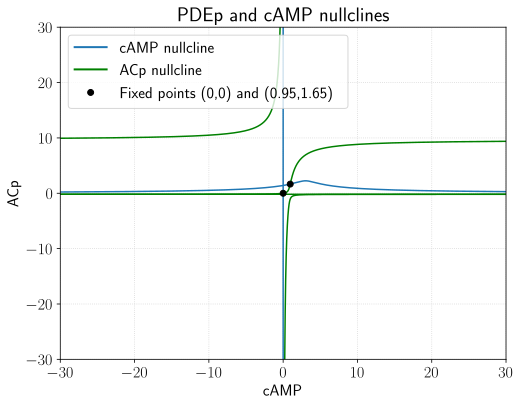

In [41]:
plot_nullclines(9.18, 0.12, 10, 2.04, 9.34, 0.56, 1.84, 0.46, 9.34, 1.26, 0.18, 1.26, 2.04, 10, 9.66)